<h1>Binary Classification using Perceptron Model</h1>
<p>In this notebook, I will be showing you how to build a flower classifier taking inspiration from neural networks</p>
<p>For simplicity, I will only be classifying a plant into two species - <i>Iris-setosa</i> and <i>Iris-virginica</i> (as they are linearly separable :D )</p>

<h2>Theory</h2>
<img src="https://cdn-images-1.medium.com/max/1600/1*UA30b0mJUPYoPvN8yJr2iQ.jpeg" />
<p>The above image is of the Perceptron model. This model is considered as the roots of the Neural Networks technology you see today.</p>
<p>Basically, this model takes in inputs (X) connected to a neuron, these connections having some weights (W). This neuron computes the net input i.e z = w<sub>1</sub>.x<sub>1</sub> + w<sub>2</sub>.x<sub>2</sub> +w<sub>3</sub>.x<sub>3</sub> + .. + w<sub>n</sub>.x<sub>n</sub>. A bias (b) value is then added to this net input value. After this, an activation function is used (here - a sigmoid / logistic function). In our case, we use a logistic function, which computes the probability (output) of answer being positive based on the features which is paramterized over the parameters w and b.</p>
<p>This still lacks a major portion. We require the backpropogation algorithm so as to compute the errors in our predictions and update the parameters after every iteration so as to make the model a good predictor of Y.</p>
<p>Logistic function is not the only activation function. There are many more !!!</p>

<h2>Importing packages</h2>
<p>The three packages that have rocked the data science world are :-</p>
<ol>
    <li>NumPy, for vectorized calculations</li>
    <li>Matplotlib, for data visualization</li>
    <li>Pandas, for reading and manipulating with dataset</li>
</ol>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h2>Fetching the dataset</h2>
<p>Using pandas' read_csv( ) function, we read the <i>iris.csv</i> file from the current directory. As the flower ID (column = 'Id') is not useful for us in any way, we can simply drop it. Just for our sanity check, we print the first 5 rows of the dataset.</p>

In [2]:
dataset = pd.read_csv("iris.csv").drop(['Id'], axis=1)
print(dataset.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


<h2>Separating the dataset</h2>
<p>After fetching the dataset, we see that there are following features :-</p>
<ol>
    <li>SepalLengthCm : The length of the sepal in centimeters</li>
    <li>SepalWidthCm : The width of the sepal in centimeters</li>
    <li>PetalLengthCm : The length of the petal in centimeters</li>
    <li>PetalWidthCm : The widht of the petal in centimeters</li>
</ol>
<p>We also see the 'Species' column which has the following values :-</p>
<ul>
    <li><i>Iris-setosa</i></li>
    <li><i>Iris-virginica</i></li>
    <li><i>Iris-versicolor</i></li>
</ul>
<p>Based on above different values, we segragate the data based on the sepal and petal measurements for each flower species</p>

In [3]:
iris_setosa = dataset[dataset['Species'] == 'Iris-setosa']
iris_virginica = dataset[dataset['Species'] == 'Iris-virginica']
iris_versicolor = dataset[dataset['Species'] == 'Iris-versicolor']

sepal_iris_setosa = iris_setosa[['SepalWidthCm', 'SepalLengthCm', 'Species']]
sepal_iris_virginica = iris_virginica[['SepalWidthCm', 'SepalLengthCm', 'Species']]
sepal_iris_versicolor = iris_versicolor[['SepalWidthCm', 'SepalLengthCm', 'Species']]

petal_iris_setosa = iris_setosa[['PetalWidthCm', 'PetalLengthCm', 'Species']]
petal_iris_virginica = iris_virginica[['PetalWidthCm', 'PetalLengthCm', 'Species']]
petal_iris_versicolor = iris_versicolor[['PetalWidthCm', 'PetalLengthCm', 'Species']]

<h2>Visualizing the data</h2>
<p>For our case, we will classify the Iris flower based on the sepal measurements for the two classes - <i>Iris-setoasa</i> and <i>Iris-virginica</i></p>
<p>To check whether there exists any relationship between these types of flowers, we draw a scatter plot using Matplotlib library's scatter( ) function. This function takes in following arguments :-</p>
<ol>
    <li>Values on the X-axis</li>
    <li>Values on the Y-axis</li>
    <li>Color of the data point (OPTIONAL)</li>
</ol>
<p>Then just to make our graph more easier to read, we add title and labels for the respective axes.</p>

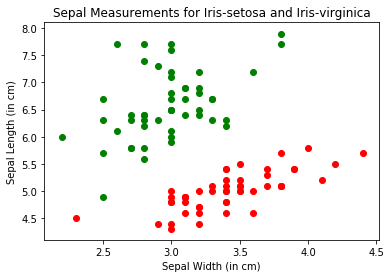

In [4]:
plt.scatter(sepal_iris_setosa['SepalWidthCm'], sepal_iris_setosa['SepalLengthCm'], color="red")
plt.scatter(sepal_iris_virginica['SepalWidthCm'], sepal_iris_virginica['SepalLengthCm'], color="green")
plt.xlabel('Sepal Width (in cm)')
plt.ylabel('Sepal Length (in cm)')
plt.title('Sepal Measurements for Iris-setosa and Iris-virginica')
plt.show()

<h2>Feature selection and Encoding</h2>
<p>We now select the features we are going to use (sepal measurements i.e SepalLengthCm and SepalWidthCm). After selecting the features, we also require to encode the class labels, that is, 1 for positive class and 0 for negative class.</p>
<p>We do the above steps using suitable NumPy and Pandas functions. After completion, we print out the dimensions of the features and labels set.</p>

In [5]:
data = dataset[dataset['Species'] != 'Iris-versicolor'].drop(['PetalWidthCm', 'PetalLengthCm'], axis=1)
labels = data['Species'].values
labels = np.where(labels == 'Iris-setosa', 1, 0)
labels = labels.reshape((1, labels.shape[0]))
features = data.drop(['Species'], axis=1).values
features = features.T
print("Features shape : " + str(features.shape))
print("Labels shape : " + str(labels.shape))

Features shape : (2, 100)
Labels shape : (1, 100)


<h2>Sigmoid Helper Function</h2>
<p>The sigmoid function is a function which takes in certain inputs and gives you the output in the range [0,1].</p>
<p>The formulae is shown as below :-</p>
<img src="https://camo.githubusercontent.com/dc45ad294e2277f9bec8d0bb5fd12b53057f0e76/68747470733a2f2f6c68362e676f6f676c6575736572636f6e74656e742e636f6d2f594c6a377572447062334c756264557a5f4a7132786c2d4c6d354b565076565a5076596f30373874504b2d5872654c4271496d52634b54744f76626271485f435130646c773256634e346654774c694e6450627666424c776d56386934564f684a6f4833397047336e5a3435755652474a68686c5550694a746841446a4f65646941" />

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

<h2>Parameter Initialization Helper Function</h2>
<p>We require the 'W' and 'b' parameters so as to build our logistic regression model. But, for training the learning algorthm, we require some initial values from which the process will start. Therefore, we initialize the weights and bias to 0. To do this, we build a helper function which takes in the number of features (dimens) and returns the weights and bias as a tuple, having the appropritate dimensions</p>

In [7]:
def initialize_weights(dimens):
    weights = np.zeros((dimens, 1))
    bias = 0
    
    return weights, bias

dimens = features.shape[0]
weights, bias = initialize_weights(dimens)

<h2>Forward Propogation and Derivatives</h2>
<p>This function contains code that computes the probability that Y = 1; given X - as well as computes the gradients i.e small changes in weights required to be updated (for backpropogation).</p>
<p>The intuition of using the logistic function is that it will give us the probability that our output is 1. E.g : h(x) = 0.7 implies that there is 70% chance that our output is 1.</p>
<p>The cost function in logistic regression is as follows :-</p>
<img src="https://camo.githubusercontent.com/ef54d4fa4553c2fa8643e4f22942e5cfd4870b50/68747470733a2f2f6c68362e676f6f676c6575736572636f6e74656e742e636f6d2f486c6b77664770394c4b79463066663544554a4b526777556a702d7768316e496b544132684c4c757049514445655f41384d4364697a4342784e356b657061347a426e7636636b7034345a556c6b4b326331746d732d476742356643424459314f72384f654e574d33434a5a6e484552314737704b7535786d43486d416d63563777" />
<p>Notice that when y is equal to 1, then the second term will be zero and will not affect the result. If y is equal to 0, then the first term will be zero and will not affect the result. For incorrect outputs, the cost function gets penalized heavily.</p>
<p>Below are some notations used :-</p>
<ol>
    <li>m - Number of training examples</li>
    <li>Z - Net input i.e W<sup>T</sup>.X + b</li>
    <li>A - Sigmoid of the net input (Probabilities)</li>
    <li>J - Cost function</li>
    <li>dW - Derivatives for weights (Small changes required in weights)</li>
    <li>db - Derivative for bias (Small change required in bias)</li>
</ol>
<p>After computing the respective values, we return the gradients and value of cost function so that the learning algorithm can utilize these in order to make the model a good flower classifier.</p> 

In [8]:
def forward_propogation(W, b, X, Y):
    m = X.shape[1]
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)
    J = (-1 / m ) * np.sum((Y * np.log(A) + (1 - Y) * np.log(1 - A)))
    
    dZ = A - Y
    dW = np.dot(dZ, X.T) / m
    db = np.sum(dZ) / m
    
    gradients = {'dW' : dW, 'db' : db}
    
    return gradients, J
    
    
grads, cost = forward_propogation(weights, bias, features, labels)
dw, db = grads['dW'], grads['db']
print("First iteration :-")
print("dw : ", dw)
print("db : ", db)
print("Cost : ", cost)

First iteration :-
dw :  [[ 0.3955 -0.111 ]]
db :  0.0
Cost :  0.6931471805599453


<h2>Backpropogation with Gradient Descent optimization technique</h2>
<p>This function uses gradient descent optimization technique, which is used so as to choose the suitable values of our parameters in order to minimize the cost function. Our function uses two new arguments as follows :-</p>
<ol>
    <li>alpha - Learning rate or step size for the gradient descent</li>
    <li>epochs - Number of iterations we wish to train our algorithm</li>
</ol>
<p>The following procedure is done :-</p>
<img src="https://camo.githubusercontent.com/fbe5097e6a3391e7f852a050387218506f8d6127/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f302a38797a766437515a4c6e3554315857672e6a7067" />
<p>Now, for particular epoch / iteration, following steps are covered :-</p>
<ol>
    <li>Compute the gradients and cost using forward propogation</li>
    <li>Append the cost value to a list for further analysis of our learning algorithm (OPTIONAL)</li>
    <li>Print the cost value after every set of iteration (OPTIONAL)</li>
    <li>Use the formula to update the weights and bias (MUST)</li>
</ol>
<p>After training, we return the optimal values of the weights as well as return the costs computed over the period of training the algorithm</p>

In [9]:
def gradient_descent(W, b, X, Y, alpha = 0.009, epochs=1000):
    costs = []
    m = X.shape[1]
    for i in range(epochs):
        grads, cost = forward_propogation(W, b, X, Y)
        costs.append(cost)
        if i % (epochs // 10) == 0:
            print("Cost at epoch " + str(i) + " : ", cost)
        dW, db = grads['dW'], grads['db']
        dW = dW.T
        
        W -= alpha * dW
        b -= alpha * b
        
    print("Training complete")
    params = {'W' : W, 'b' : b}
    
    return params, costs
    
params, costs = gradient_descent(weights, bias, features, labels)

Cost at epoch 0 :  0.6931471805599453
Cost at epoch 100 :  0.6218760553048186
Cost at epoch 200 :  0.5654909413867139
Cost at epoch 300 :  0.5180564225919233
Cost at epoch 400 :  0.47788048761902374
Cost at epoch 500 :  0.44358808235706243
Cost at epoch 600 :  0.4140805976049988
Cost at epoch 700 :  0.3884868138163424
Cost at epoch 800 :  0.3661166963943033
Cost at epoch 900 :  0.346422252413687
Training complete


<h2>Predictions over new data</h2>
<p>This function uses the optimal parameter values and computes the probability via forward pass and compares the results to the labels, so as to compute the accuracy of our model</p>
<p><b>Note :</b> I used the same training data to compute the accuracy of our model. We actually provide the testing set (unseen data) to test our model</p>

In [10]:
def predict(params, X_test, Y_test):
    W, b = params['W'], params['b']
    Z = np.dot(W.T, X_test) + b
    pred = sigmoid(Z)
    
    pred_labels = np.where(pred > 0.5, 1, 0)
    accuracy = 100 * np.mean(pred_labels == labels)
    print("Accuracy : %f %s" % (accuracy, '%'))

predict(params, features, labels)

Accuracy : 99.000000 %


<h2>Learning Curve</h2>
<p>Now using Matplotlib, we plot the cost values of our algorithm over the number of iterations (epochs). This curve gives us an insight that our learning algorithm is doing pretty well.</p>

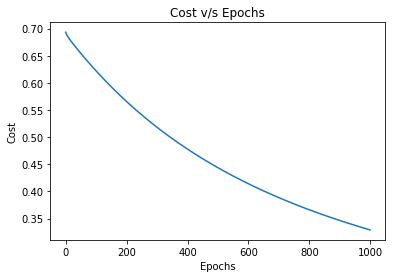

In [11]:
plt.plot(range(1000), costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost v/s Epochs')
plt.show()